In [1]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn import preprocessing
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import os
#import nxviz as nv
os.getcwd()

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'C:\\Users\\sumith.singh\\A_SUBEX'

# Importing and Analyzing the data

In [2]:
col_names = ['Node', 'Behavior', 'Node', 'Day', 'Flag', 'Nbrs', 'Num_Nbrs',
       'Nbrs_Dffsed', 'Num_Nbrs_Dffsd', 'high_nbrs', 'high_nbr_diff',
       'Deg_Ctrlty', 'Probability', 'ratio', 'tcudorp', 'knar', 'knar_norm']

In [3]:
df = pd.read_csv('df2B_Diff_Algo2_SKA.csv',header=0, names = col_names)

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.sample(5)

,Node,Behavior,Node.1,Day,Flag,Nbrs,Num_Nbrs,Nbrs_Dffsed,Num_Nbrs_Dffsd,high_nbrs,high_nbr_diff,Deg_Ctrlty,Probability,ratio,tcudorp,knar,knar_norm
565835,565835,B,254773803611,1,Diffused,"['254770704641', '254771466819']",2,[],0,['254771466819'],[],1.652203e-06,0.915794,0.000000,0.000000e+00,NaN,NaN
220869,220869,B,254777103397,100,Not Diffused,"['254770575056', '254771601117', '254777315558...",7,['254771319334'],1,['254771319334'],['254771319334'],5.782711e-06,0.465316,0.142857,3.843985e-07,819980.0,0.847065
995232,995232,B,254775877101,100,Not Diffused,"['254773940488', '254773733882']",2,[],0,['254773733882'],[],1.652203e-06,0.747567,0.000000,0.000000e+00,369499.0,0.381704
618715,618715,B,254771843616,100,Not Diffused,['254772431447'],1,['254772431447'],1,['254772431447'],['254772431447'],8.261015e-07,0.631069,1.000000,5.213267e-07,858879.0,0.887249
983663,983663,B,254774664622,100,Not Diffused,['254774313179'],1,[],0,['254774313179'],[],8.261015e-07,0.704993,0.000000,0.000000e+00,369499.0,0.381704


In [5]:
df.columns

Index(['Node', 'Behavior', 'Node.1', 'Day', 'Flag', 'Nbrs', 'Num_Nbrs',
       'Nbrs_Dffsed', 'Num_Nbrs_Dffsd', 'high_nbrs', 'high_nbr_diff',
       'Deg_Ctrlty', 'Probability', 'ratio', 'tcudorp', 'knar', 'knar_norm'],
      dtype='object')

In [6]:
from collections import Counter
Counter(df['Flag'])

Counter({'Diffused': 121498, 'Not Diffused': 968025, 'Resistant': 120983})

In [7]:
df['Flag'].value_counts()

Not Diffused    968025
Diffused        121498
Resistant       120983
Name: Flag, dtype: int64

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


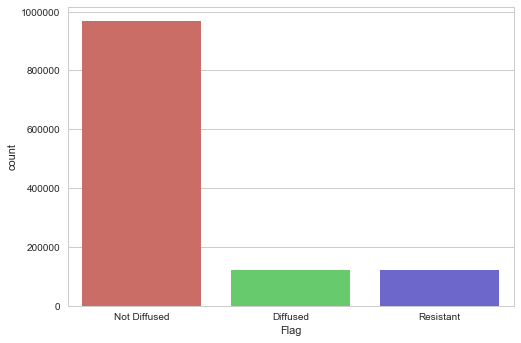

In [8]:
sns.countplot(x='Flag', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [9]:
#df.dtypes
df['Flag'].unique()

array(['Not Diffused', 'Diffused', 'Resistant'], dtype=object)

# Creating the subset DataFrame

In [10]:
dfLogR = df[['Day','Num_Nbrs','Num_Nbrs_Dffsd','Deg_Ctrlty','ratio','tcudorp','Flag']].copy()
dfLogR.sample(5)

,Day,Num_Nbrs,Num_Nbrs_Dffsd,Deg_Ctrlty,ratio,tcudorp,Flag
488156,100,7,0,5.782711e-06,0.0,0.000000e+00,Not Diffused
1060502,100,1,0,8.261015e-07,0.0,0.000000e+00,Not Diffused
659387,100,1,1,8.261015e-07,1.0,4.134682e-07,Not Diffused
863337,100,1,0,8.261015e-07,0.0,0.000000e+00,Not Diffused
1195235,100,1,0,8.261015e-07,0.0,0.000000e+00,Not Diffused


In [11]:
dfLogR.Flag.unique()

array(['Not Diffused', 'Diffused', 'Resistant'], dtype=object)

In [12]:
def LogR(df):
    if df['Flag'] == 'Diffused':
        return 1
    elif df['Flag'] == 'Not Diffused':
        return 0
    else:
        return 0

In [13]:
dfLogR['y'] = dfLogR.apply(LogR, axis=1)
dfLogR.sample(5)

,Day,Num_Nbrs,Num_Nbrs_Dffsd,Deg_Ctrlty,ratio,tcudorp,Flag,y
534346,100,7,0,0.000006,0.000000,0.000000e+00,Not Diffused,0
809602,1,9,2,0.000007,0.222222,1.554363e-06,Diffused,1
500204,100,7,1,0.000006,0.142857,2.352756e-07,Not Diffused,0
475474,100,2,0,0.000002,0.000000,0.000000e+00,Not Diffused,0
638641,100,2,0,0.000002,0.000000,0.000000e+00,Not Diffused,0


In [14]:
dfLogR.dtypes

Day                 int64
Num_Nbrs            int64
Num_Nbrs_Dffsd      int64
Deg_Ctrlty        float64
ratio             float64
tcudorp           float64
Flag               object
y                   int64
dtype: object

In [15]:
dfLogR.columns

Index(['Day', 'Num_Nbrs', 'Num_Nbrs_Dffsd', 'Deg_Ctrlty', 'ratio', 'tcudorp',
       'Flag', 'y'],
      dtype='object')

In [16]:
dfLogR.groupby('Day').mean()

,Num_Nbrs,Num_Nbrs_Dffsd,Deg_Ctrlty,ratio,tcudorp,y
Day,,,,,,
1,3.714473,0.380138,0.000003,0.10237,3.181637e-07,1.0
100,3.745621,0.372004,0.000003,0.09953,1.467859e-07,0.0


In [17]:
dfLogR['Day'].value_counts()

100    1089008
1       121498
Name: Day, dtype: int64

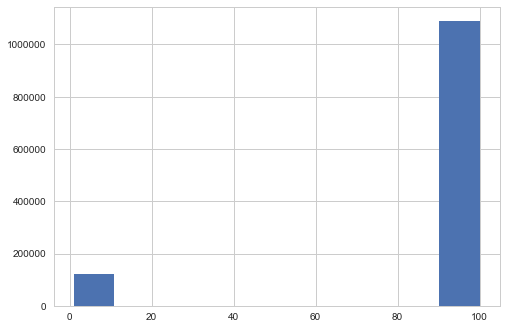

In [18]:
dfLogR.Day.hist()
plt.show()

In [19]:
#This takes lot of time so commented
#sns.pairplot(dfLogR)
#plt.show()

In [20]:
#Assign feature columns as list:feature_cols
feature_cols = ['Num_Nbrs','Num_Nbrs_Dffsd','Deg_Ctrlty','ratio','tcudorp']

# Assign to X  a subset of the data including only feature names
X = dfLogR[feature_cols]

In [21]:
#Assign to y the response variable as Pandas series
y = dfLogR['y']

In [22]:
X.sample(5)

,Num_Nbrs,Num_Nbrs_Dffsd,Deg_Ctrlty,ratio,tcudorp
165912,1,0,8.261015e-07,0.0,0.0
1108992,1,0,8.261015e-07,0.0,0.0
1151828,1,0,8.261015e-07,0.0,0.0
957591,1,0,8.261015e-07,0.0,0.0
1029544,1,0,8.261015e-07,0.0,0.0


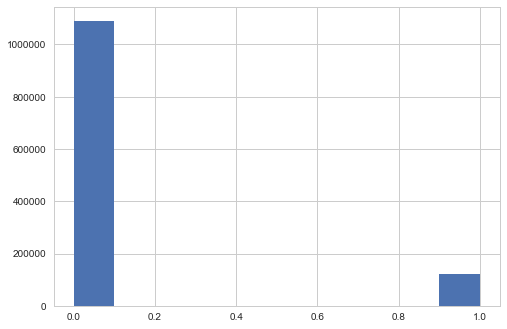

In [23]:
y.hist()
plt.show()

In [ ]:
# Import SK Learn train test split
from sklearn.cross_validation import train_test_split
# Assign variables to capture train test split output 
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Implementing the model

In [24]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())
# The p-value for the variables should be smaller than 0.05 (if we are talking of 5% confidence interval).
# Only then the variable is significant to the model

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.466182
         Iterations: 35


C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              1210506
Model:                          Logit   Df Residuals:                  1210501
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Jul 2018   Pseudo R-squ.:                 -0.4305
Time:                        16:06:23   Log-Likelihood:            -5.6432e+05
converged:                      False   LL-Null:                   -3.9450e+05
                                        LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Num_Nbrs          -0.6444      0.025    -25.736      0.000      -0.693      -0.595
Num_Nbrs_Dffsd     2.4757      0.011    225.806      0.000       2.454       2.497
Deg_Ctrlty       165.6845      3e+04

# Logistic Regression Model Fitting

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Cross Validation

In [26]:
#Cross Validation attempts to avoid overfitting while still producing a prediction for each observation dataset.
# We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [27]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits = 10, random_state = 7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train,
                                         cv = kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" %
     (results.mean()))

10-fold cross validation average accuracy: 0.900


In [28]:
#If the average accuracy remains very close to the Logistic Regression model accuracy,
#Then, we can conclude that our model generalizes well.

# Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test)
print(confusion_matrix)

[[326519      0]
 [     0  36633]]


# Precision, Recall, F-measure & Support

In [ ]:
#tp = true positive
#tn = true negative
#fp = false positive
#fn = false negative
# precision = tp/(tp + fp). 
#The PRECISION is intuitively the ability of 
#the classifier to not label a sample as positive if it is negative
#  recall = tp/(tp+fn)
# RECALL is intutively the ability of 
# the classifier to find all the positive samples
# F-beta
# The F-beta score can be interpreted as weighted harmonic mean of the 
# precision and recall.
# F-beta score reaches its value at 1 and worst score at 0.
# The F-beta score weights the recall more than the precision 
# by a factor of beta.
# beta = 1.0 means recall and precision are equally important.
# The SUPPORT is the number of occurences of each class in y_test

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    326519
          1       1.00      1.00      1.00     36633

avg / total       1.00      1.00      1.00    363152



# ROC [Receiver Operating Characteristic] Curve

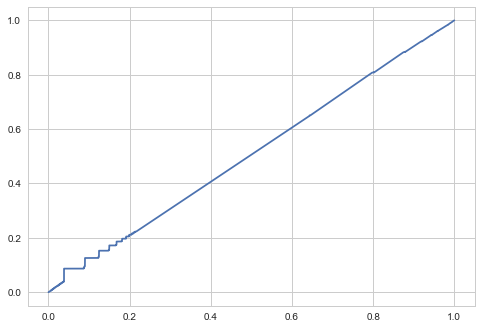

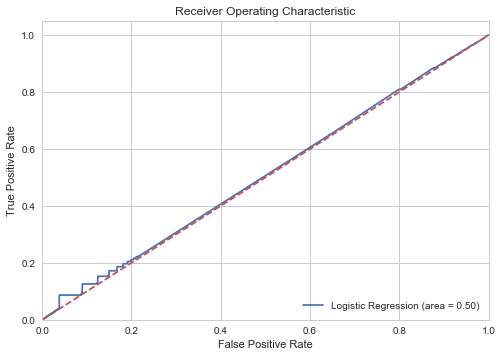

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#The Receiver Operating Characteristic (ROC) curve is another common tool
# used with binary classifiers. 
# The dotted line represents the ROC curve of a purely random classifier:
# A good classifier stays as far away from that line as possible
#(towards the top-left corner)